<a href="https://colab.research.google.com/github/IaponaMother/Artificial_Neuron/blob/master/beton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('sample_data/beton.csv')
features = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
target = 'strength'
print(data)
x = data[features].values
y = data[target].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.67, random_state = 42)



      cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      540.0    0.0    0.0  162.0           2.5     1040.0    676.0   28   
1      540.0    0.0    0.0  162.0           2.5     1055.0    676.0   28   
2      332.5  142.5    0.0  228.0           0.0      932.0    594.0  270   
3      332.5  142.5    0.0  228.0           0.0      932.0    594.0  365   
4      198.6  132.4    0.0  192.0           0.0      978.4    825.5  360   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1026   322.2    0.0  115.6  196.0          10.4      817.9    813.4   28   
1027   148.5  139.4  108.6  192.7           6.1      892.4    780.0   28   
1028   159.1  186.7    0.0  175.6          11.3      989.6    788.9   28   
1029   260.9  100.5   78.3  200.6           8.6      864.5    761.5   28   

      strength  
0        79.99  
1        61.89  
2        40.27  
3        41.05  
4 

In [76]:
mean = x_train.mean(axis = 0)  # среднее значение
std = x_train.std(axis = 0)  # стандартное отклонение
print(mean)
print(" \n ")
print(std)


[285.67405797  76.12115942  50.38826087 182.10753623   6.05985507
 974.03130435 770.46942029  46.20434783]
 
 
[108.80040352  88.04425     62.9348464   21.07078824   6.05625775
  78.6166135   80.13527625  61.54400084]


In [77]:
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
print(len(x_test), len(y_test))
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (x_train.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.compile(optimizer = "adam", loss = "mse", metrics= ['mae'])
history = model.fit(x_train,
                    y_train,
                    epochs=300,
                    validation_split = 0.1,
                    verbose = 1)

340 340
Epoch 1/300
20/20 [==============================] - 1s 10ms/step - loss: 1572.7365 - mae: 35.9314 - val_loss: 1596.1288 - val_mae: 36.9185
Epoch 2/300
20/20 [==============================] - 0s 3ms/step - loss: 1536.7571 - mae: 35.4482 - val_loss: 1543.9773 - val_mae: 36.2113
Epoch 3/300
20/20 [==============================] - 0s 4ms/step - loss: 1455.0619 - mae: 34.3048 - val_loss: 1430.3914 - val_mae: 34.6257
Epoch 4/300
20/20 [==============================] - 0s 4ms/step - loss: 1288.4049 - mae: 31.9068 - val_loss: 1212.0159 - val_mae: 31.3933
Epoch 5/300
20/20 [==============================] - 0s 3ms/step - loss: 1002.3505 - mae: 27.3977 - val_loss: 885.0645 - val_mae: 26.0420
Epoch 6/300
20/20 [==============================] - 0s 4ms/step - loss: 654.8853 - mae: 21.0699 - val_loss: 539.0449 - val_mae: 19.2289
Epoch 7/300
20/20 [==============================] - 0s 3ms/step - loss: 373.9378 - mae: 15.4323 - val_loss: 322.5411 - val_mae: 14.4702
Epoch 8/300
20/20 [====

In [107]:
scores = model.evaluate(x_test, y_test, verbose = 1)
print("Средняя абсолюная ошибка на тестовых данных:", round(scores[1], 4))
print("\n")
test_index = 90
pred = model.predict(x_test)
prediction = []
prediction2 = []
for i in range(len(pred)):
  prediction.append(max(pred[i]))
print("Предсказанная прочность:", round(prediction[test_index], 3), ", правильная прочность: ", y_test[test_index])


11/11 [==============================] - 0s 2ms/step - loss: 39.3954 - mae: 4.9013
Средняя абсолюная ошибка на тестовых данных: 4.9013


Предсказанная прочность: 32.419 , правильная прочность:  31.65
340


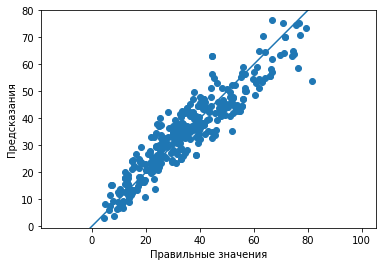

In [108]:
plt.scatter(y_test, prediction)
plt.xlabel('Правильные значения')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

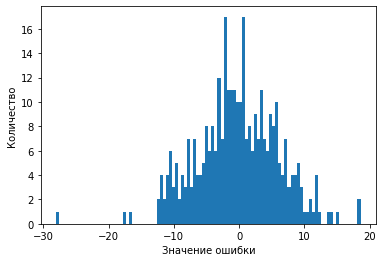

In [110]:
error = prediction - y_test
plt.hist(error, bins = 100)
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()